In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.io import output_file
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
berkshire3_df = pd.read_excel('/content/drive/Shared drives/BU Spark! CS506 - CPCS Team/Berkshire/3. 1.1.10 - 12.31.18 All DAMION excl invest and juvenile.xlsx')
berkshire4_df = pd.read_excel('/content/drive/Shared drives/BU Spark! CS506 - CPCS Team/Berkshire/4. 1.1.19 - 1.14.22 All DAMION excl invest and juvenile.xlsx')

In [ ]:
df = pd.concat([berkshire3_df, berkshire4_df])
df.head()

,Status,Nmbr Cs,Id Prsn Dfndnt,Offense Dt,Court Code,Chrg Cnt,Chrg Code,Chrg Desc,Case Type,Crime Type,...,Min Actl Jail Imp Term Unt,Max Actl Jail Imp Term,Max Actl Jail Imp Unt,Code Fclty,Min Imp Cmnty Srvc Term,Min Imp Cmnty Srvc Unt,Max Imp Cmnty Srvc,Max Imp Cmnty Srvc Unt,Text Cmnt,Desc Ofcr Agncy
0,Closed,12-06-065777,24840.0,2012-05-30 00:00:00,CBDC,1.0,90/23/H,"REGISTRATION SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Cheshire
1,Closed,12-06-065777,24840.0,2012-05-30 00:00:00,CBDC,2.0,90/34J,UNINSURED MOTOR VEHICLE c90 §34J,Motor Vehicle,Operating After Suspension or Revocation,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Cheshire
2,Closed,13-01-069322,24840.0,2013-01-08 00:00:00,CBDC,1.0,90/34J,UNINSURED MOTOR VEHICLE c90 §34J,Motor Vehicle,Operating After Suspension or Revocation,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Cheshire
3,Closed,13-01-069322,24840.0,2013-01-08 00:00:00,CBDC,2.0,90/23/D,"LICENSE SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Cheshire
4,Closed,13-01-069322,24840.0,2013-01-08 00:00:00,CBDC,3.0,90/23/H,"REGISTRATION SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,...,D,NaN,D,NaN,NaN,D,NaN,D,NaN,MSP Cheshire


In [ ]:
data = df[["Chrg Cnt", "Chrg Desc", "Case Type", "Crime Type", "Race", "Gender", "Disp Type", "Disp Desc", "Sentence Translation"]]
data.head()

,Chrg Cnt,Chrg Desc,Case Type,Crime Type,Race,Gender,Disp Type,Disp Desc,Sentence Translation
0,1.0,"REGISTRATION SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,W,F,Converted to Civil,Converted to Civil,Fines
1,2.0,UNINSURED MOTOR VEHICLE c90 §34J,Motor Vehicle,Operating After Suspension or Revocation,W,F,Converted to Civil,Converted to Civil,Fines
2,1.0,UNINSURED MOTOR VEHICLE c90 §34J,Motor Vehicle,Operating After Suspension or Revocation,W,F,Dismissed,Dismissed,NaN
3,2.0,"LICENSE SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,W,F,Dismissed,Dismissed,NaN
4,3.0,"REGISTRATION SUSPENDED, OP MV WITH c90 §23",Motor Vehicle,Operating After Suspension or Revocation,W,F,Dismissed,Dismissed,NaN


([<matplotlib.patches.Wedge at 0x7f545dec9f90>,
 [Text(-0.8678783555861013, 0.6758603109409258, 'W'),
  Text(0.7186079936404114, -0.8328280443621616, 'B'),
  Text(1.0515620506875796, -0.3228269715400688, 'U'),
  Text(1.0930268349920804, -0.12366219303892237, 'H'),
  Text(1.0998869760958587, -0.015768316800086682, 'A'),
  Text(1.0999923388647905, -0.004105415785034993, 'C'),
  Text(1.0999971726435975, -0.0024940280855479256, 'I'),
  Text(1.0999989820401845, -0.0014964994347410271, 'EI'),
  Text(1.099999676004843, -0.0008442684648544611, 'BR'),
  Text(1.099999967164782, -0.00026877030811685385, 'M')])

<BarContainer object of 10 artists>

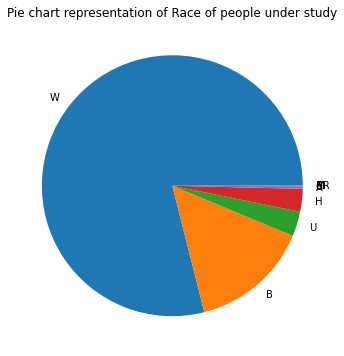

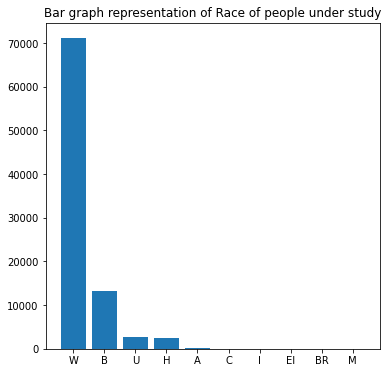

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Pie chart representation of Race of people under study")
display(plt.pie(data["Race"].value_counts(), labels = (data["Race"].dropna()).unique()))

plt.figure(figsize=(6, 6))
plt.title("Bar graph representation of Race of people under study")
display(plt.bar((data["Race"].dropna()).unique(), data["Race"].value_counts()))

In [ ]:
data["Crime Type"].value_counts()

Operating After Suspension or Revocation    14134
Other                                       12878
Assault & Battery                            7104
Unlicensed                                   6520
Operating Under the Influence of Alcohol     5986
                                            ...  
Assault & Battery on Public Employee            3
Domestic Violence Murder                        2
Sexually Dangerous Person                       2
Child Fatality                                  2
Forfeiture                                      1
Name: Crime Type, Length: 80, dtype: int64

In [ ]:
data["Race"].value_counts()

W     71102
B     13315
H      2770
U      2540
A       279
I        25
M        17
EI        9
C         8
BR        7
Name: Race, dtype: int64

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 2 artists>

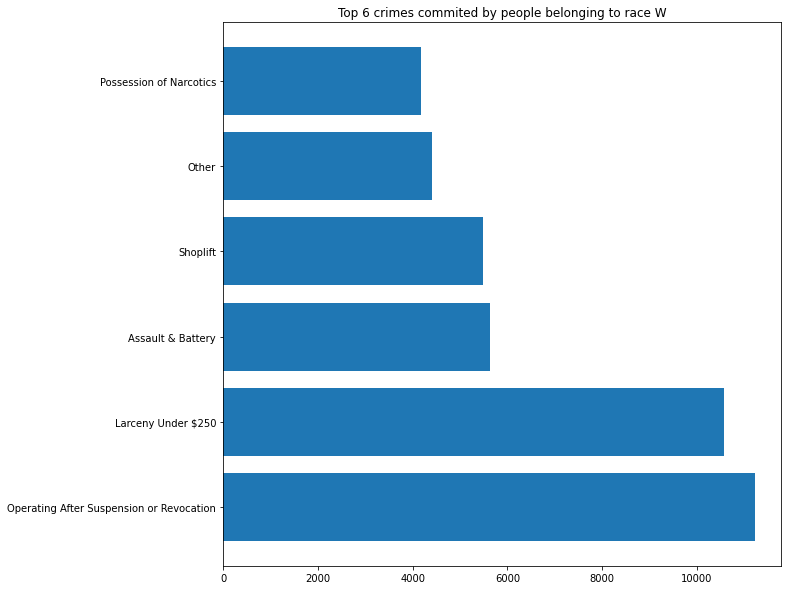

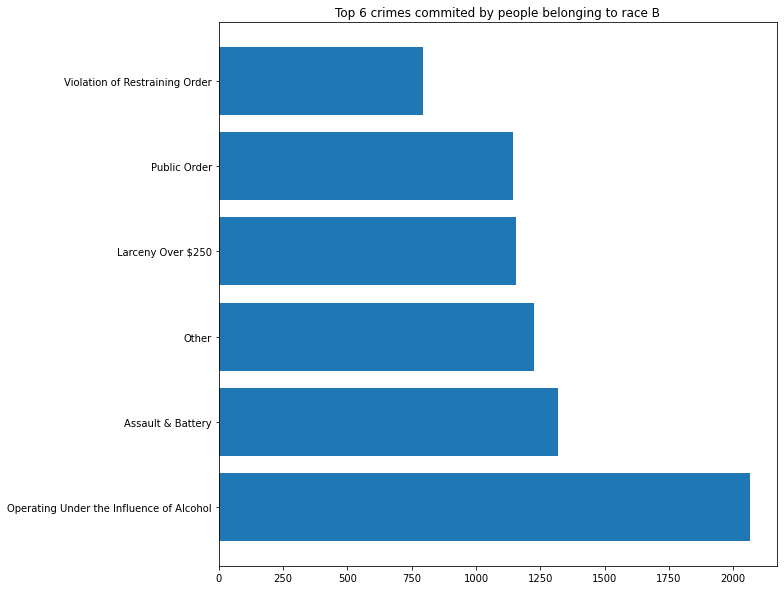

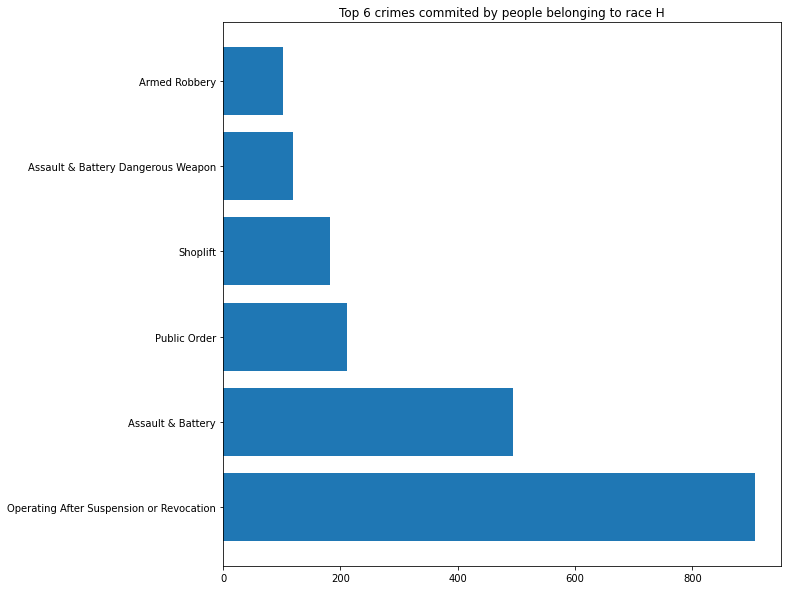

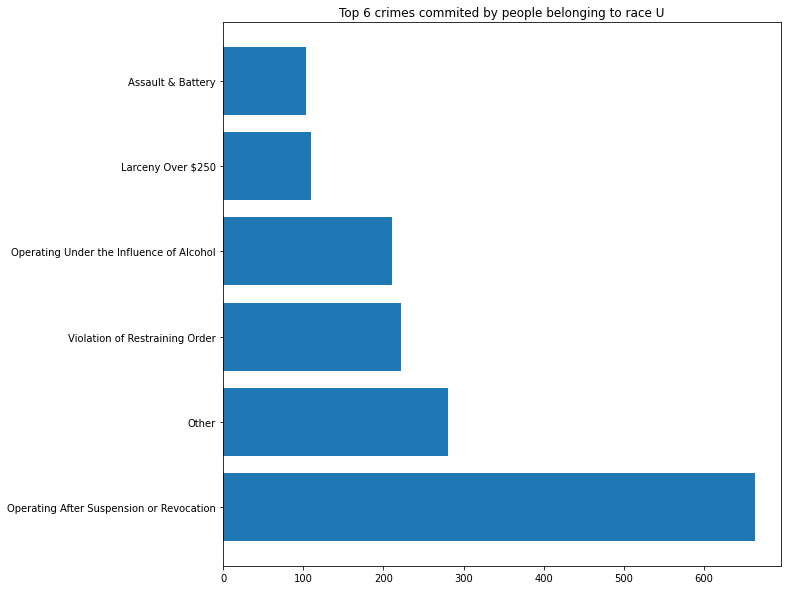

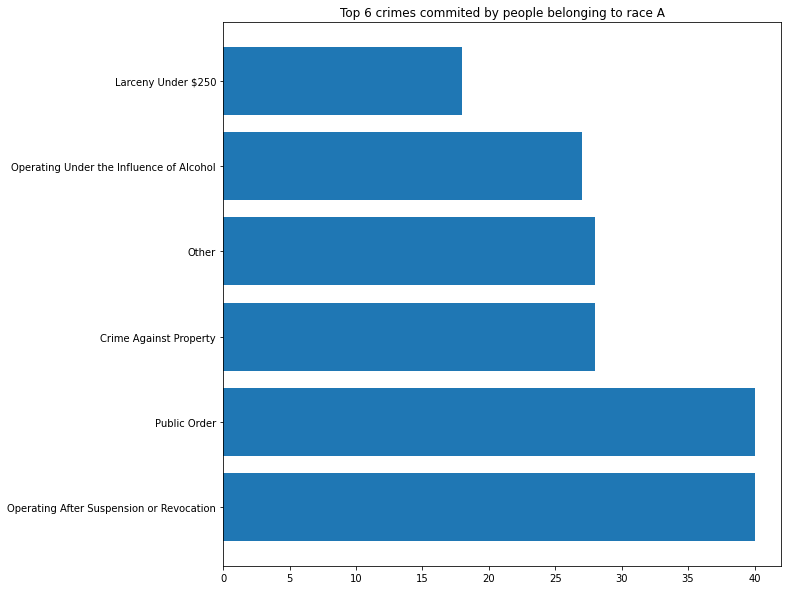

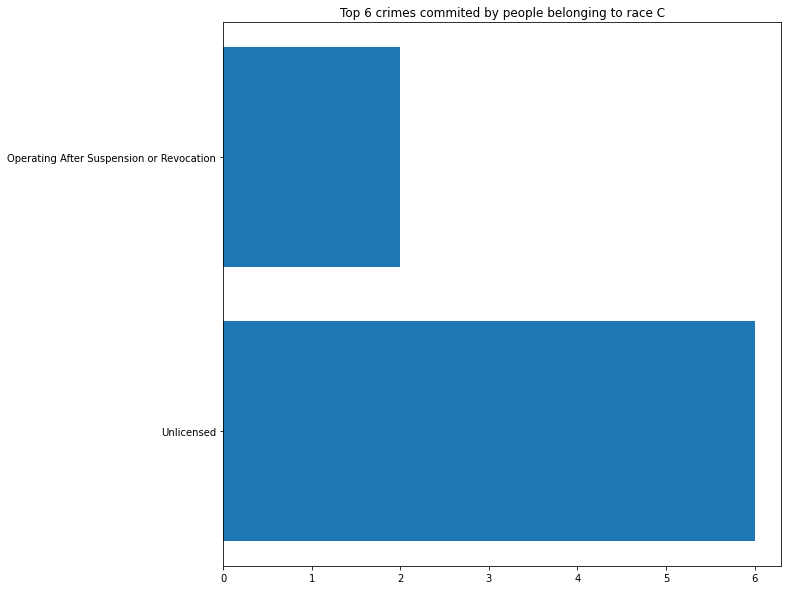

In [ ]:
for r in ["W", "B", "H", "U", "A", "C"]:
  df_dummy = data.loc[data["Race"] == r]
  plt.figure(figsize=(10, 10))
  plt.title("Top 6 crimes commited by people belonging to race "+r)
  display(plt.barh((df_dummy["Crime Type"].dropna()).unique()[:6], df_dummy["Crime Type"].value_counts()[:6]))   

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 1 artists>

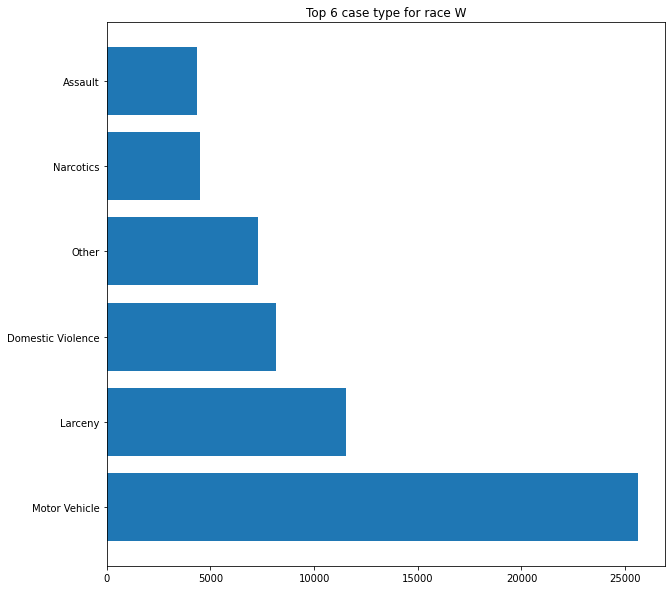

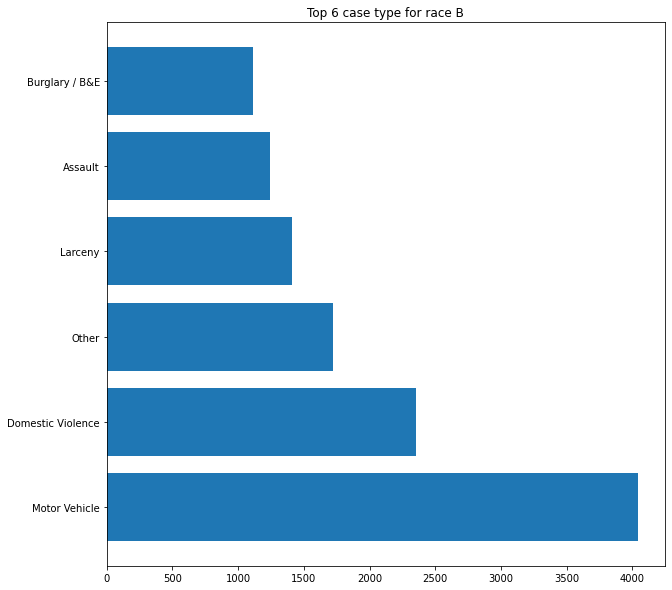

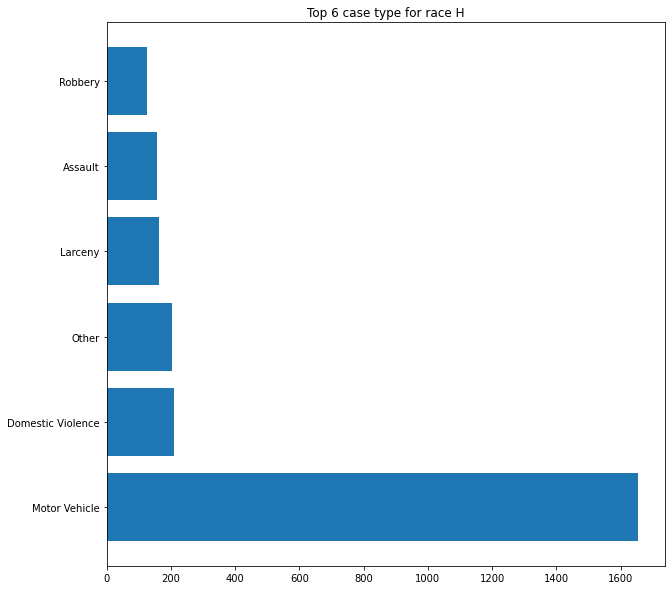

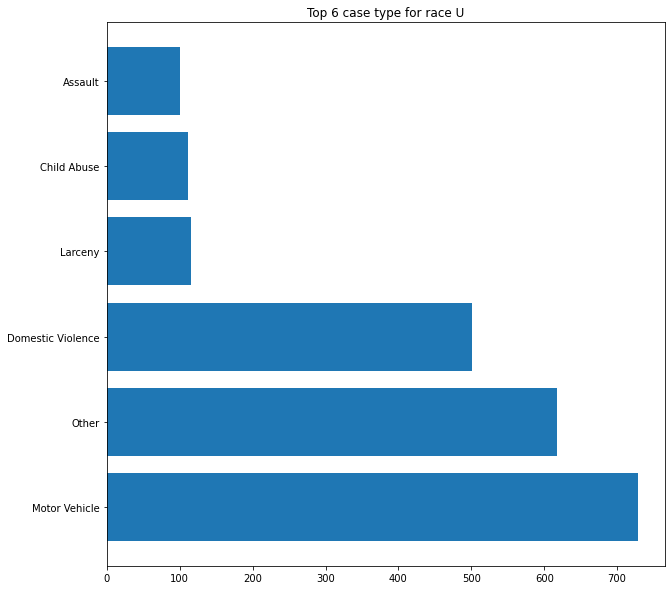

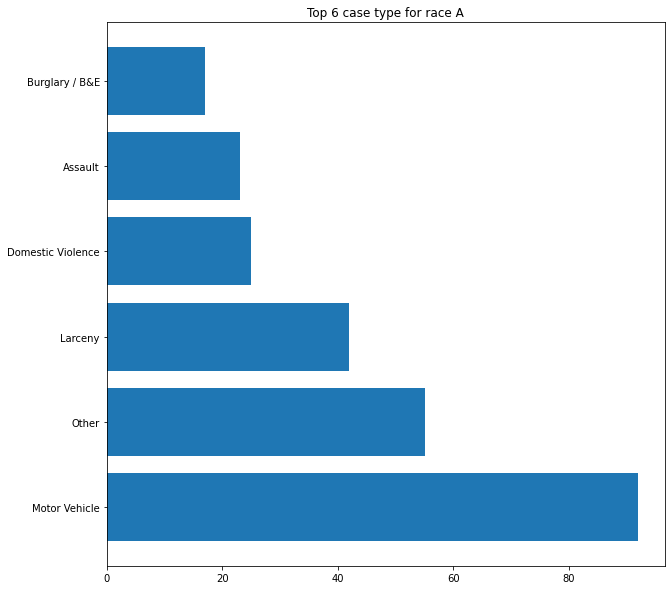

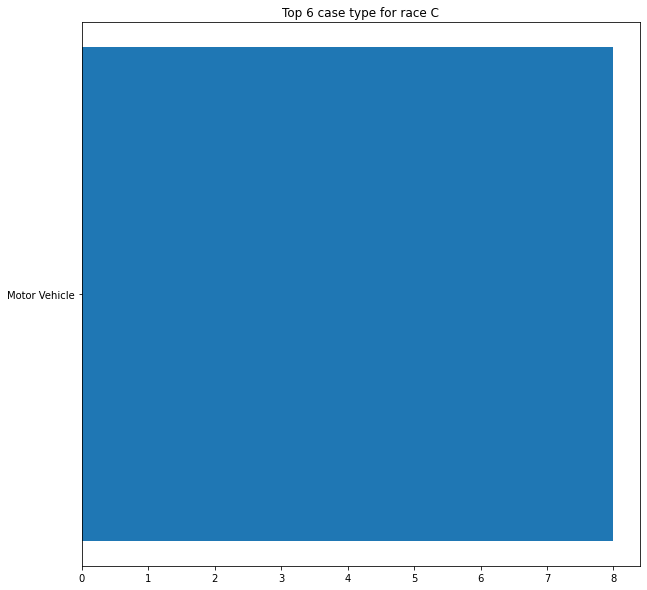

In [ ]:
for r in ["W", "B", "H", "U", "A", "C"]:
  df_dummy = data.loc[data["Race"] == r]
  plt.figure(figsize=(10, 10))
  plt.title("Top 6 case type for race "+r)
  display(plt.barh((df_dummy["Case Type"].dropna()).unique()[:6], df_dummy["Case Type"].value_counts()[:6]))   

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 6 artists>

<BarContainer object of 3 artists>

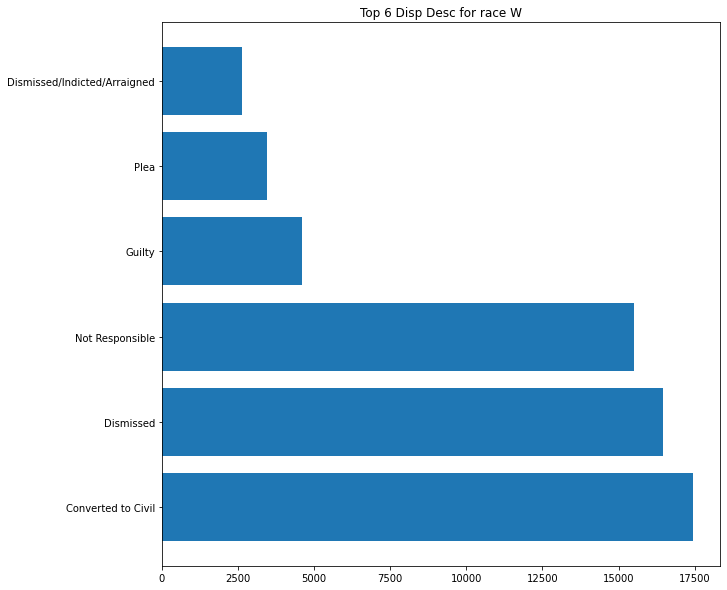

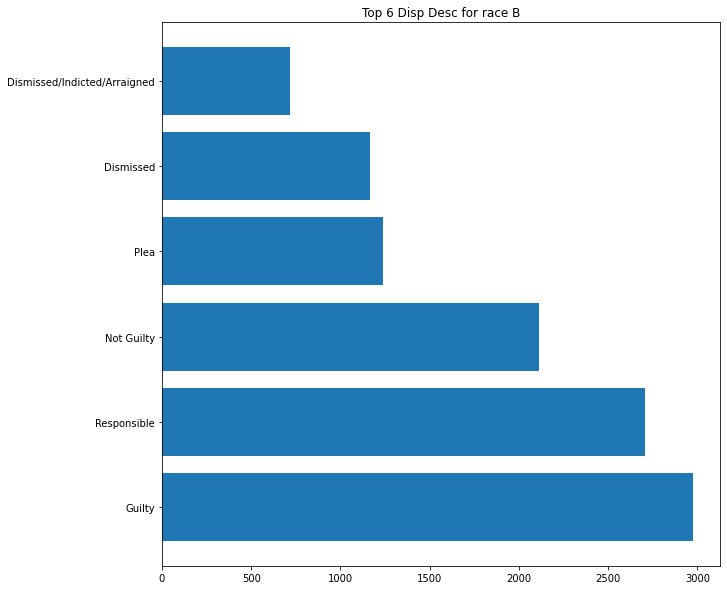

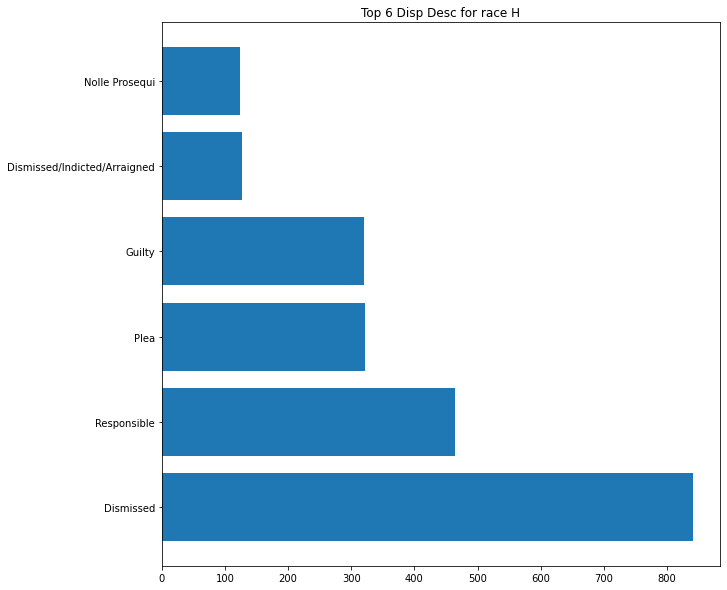

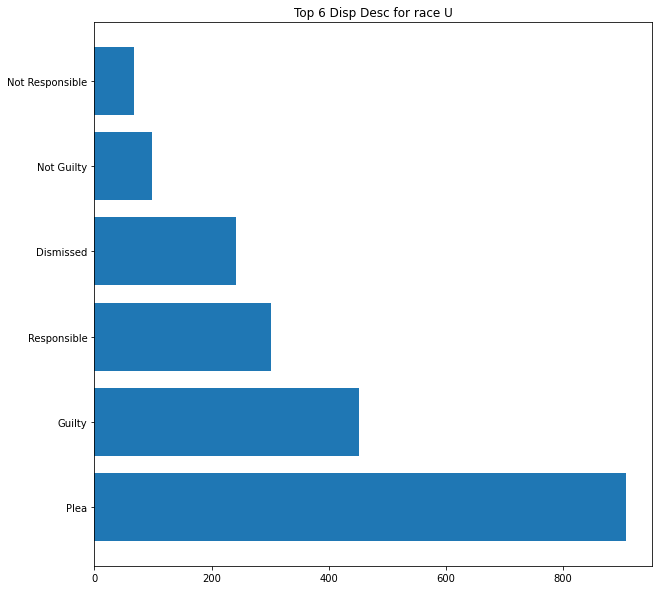

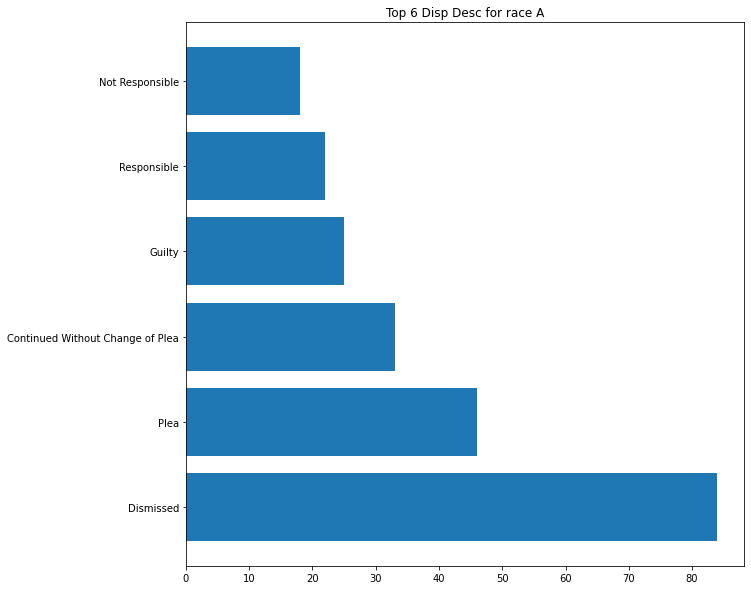

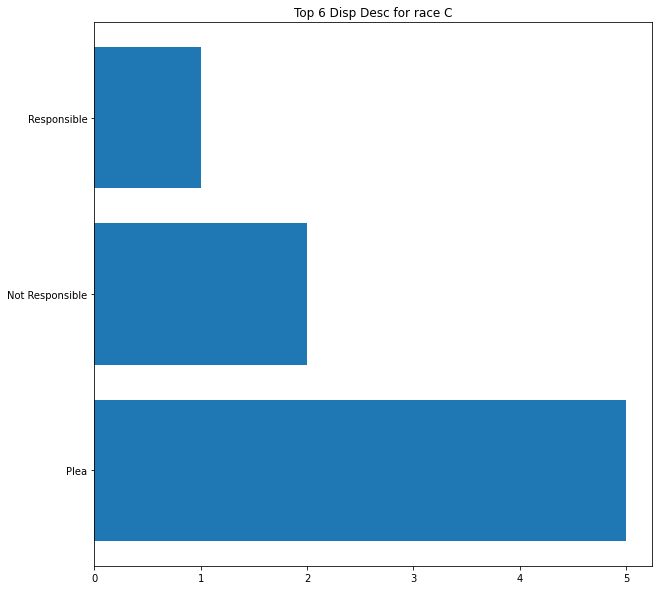

In [ ]:
for r in ["W", "B", "H", "U", "A", "C"]:
  df_dummy = data.loc[data["Race"] == r]
  plt.figure(figsize=(10, 10))
  plt.title("Top 6 Disp Desc for race "+r)
  display(plt.barh((df_dummy["Disp Desc"].dropna()).unique()[:6], df_dummy["Disp Desc"].value_counts()[:6]))   